In [3]:
# importing required libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
# reading the dataset

rnf_data=pd.read_csv(r'./csv_files/iris.csv')

In [6]:
rnf_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
#finding the shape

rnf_data.shape

(150, 5)

In [8]:
# finding the descriptive statistics 

rnf_data.describe().round(2)

,sepal_length,sepal_width,petal_length,petal_width
count,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [9]:
# finding the meta data 

rnf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
# columns name

rnf_data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [11]:
# checking for null values

rnf_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [12]:
# checking the percentage of missing value

rnf_data.isnull().sum()/len(rnf_data)

sepal_length    0.0
sepal_width     0.0
petal_length    0.0
petal_width     0.0
species         0.0
dtype: float64

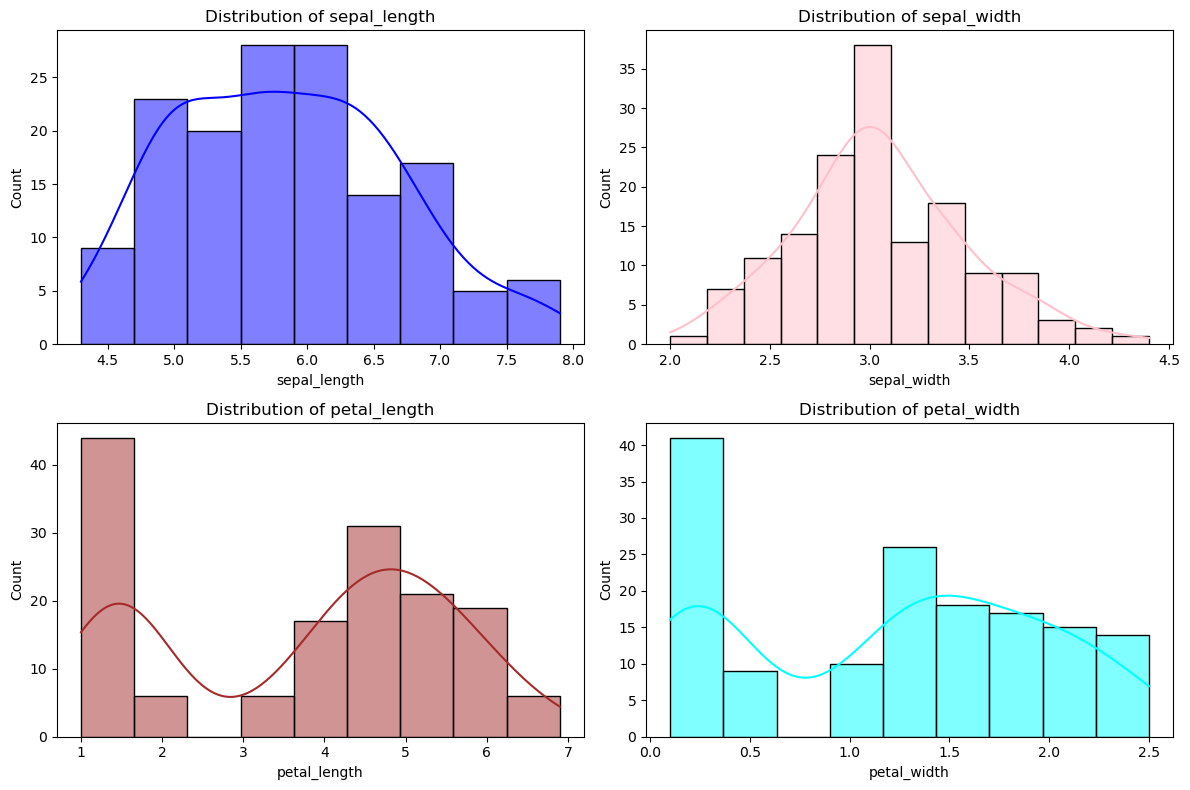

In [15]:
# finding the distribution of the data which describes the:
# 1) how much features data points have distributed or spread in data(checks the normal (GAUSSIAN) distribution)
# 2) skeweness in the data points
# 3) we can identify the outliers using the distribution

colors = ['red','blue', 'pink', 'brown', 'cyan']
plt.figure(figsize=(12,8))
for i, column in enumerate(rnf_data.columns[:-1],1): # we are taking the each features from dataset excluding target feature and this are itreable 
    plt.subplot(2,2,i)  # creating the sub plot that will display the each features of dataset
    sns.histplot(rnf_data[column],kde=True, color=colors[i % len(colors)]) # creating the histogram and kernal distribution estimation smoothen on datapoints
    plt.title(f"Distribution of {column}")
    plt.tight_layout()
plt.show()

In [16]:
# finding the distribution of the target variable

print("Distribution of the target variable:")
print(rnf_data['species'].value_counts())

Distribution of the target variable:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


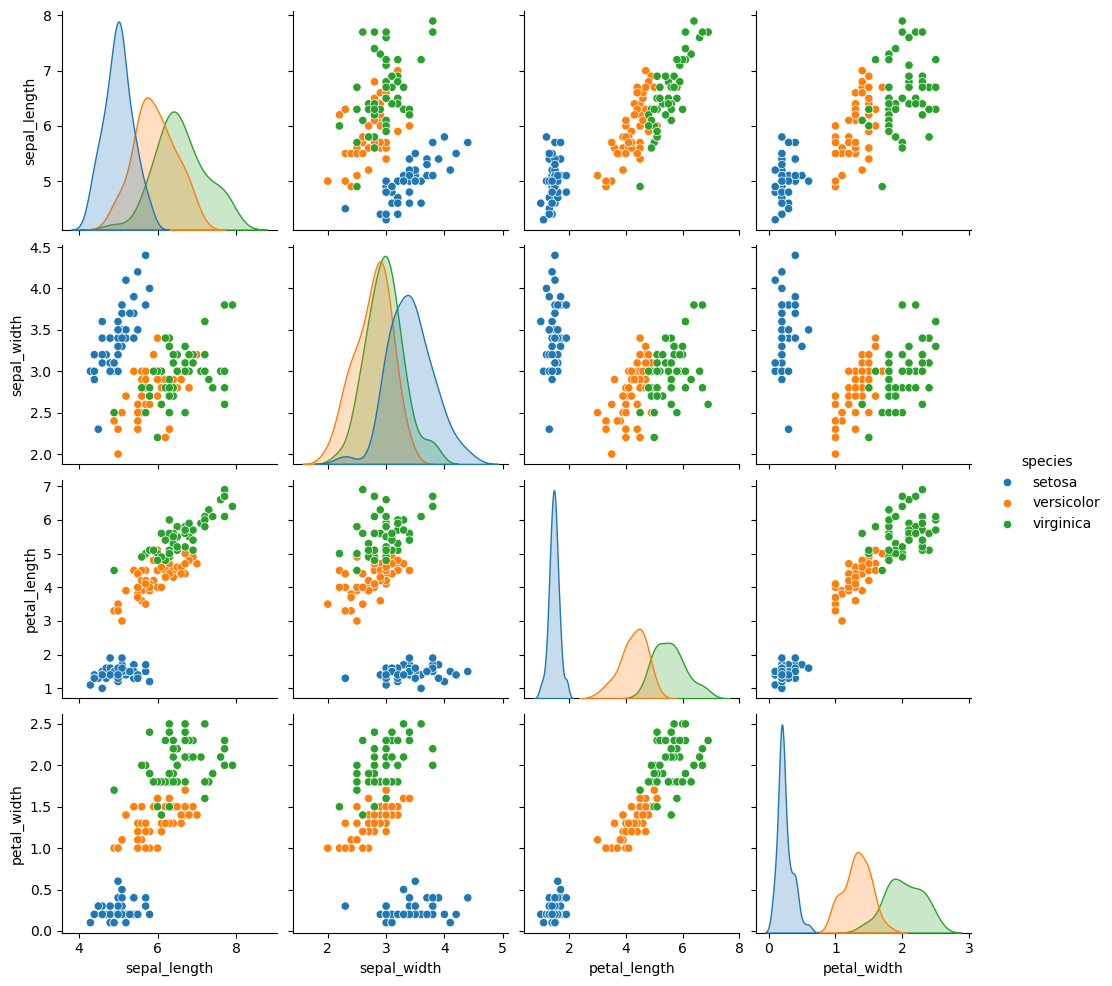

In [18]:
# visualization feature distriubtion usin pairplot

sns.pairplot(rnf_data, hue="species")
plt.show()

The Correlation matrix is: 
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000



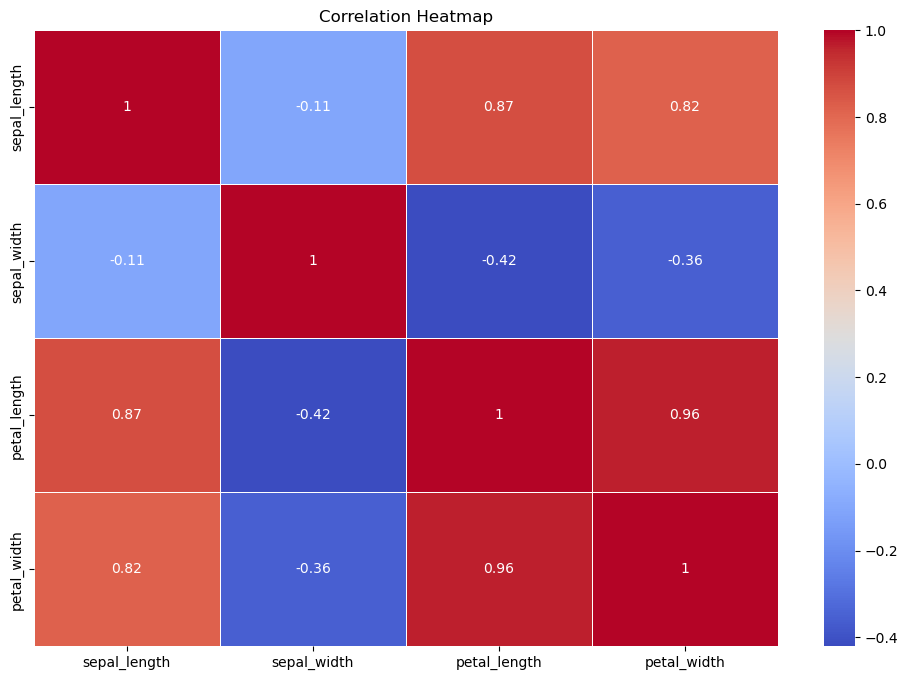

In [19]:
## finding the correlation between the features 

correlation_matrix = rnf_data.iloc[:, :-1].corr()  # Finds the correlation coefficients(PEARSON CORRELATION) between multiple variables (range -1 to +1)
print(f"The Correlation matrix is: \n{correlation_matrix}\n")
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5) # displays the heatmap (correlation matrix) 
plt.title("Correlation Heatmap")
plt.show()

In [20]:
# dividing the dataset into independent and dependent feature

x=rnf_data.iloc[:,:-1] # selects the independent features
y=rnf_data.iloc[:,-1] # selects the target feature

In [21]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [22]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [23]:
# Now we are spliting the data into training and testing part

x_train,x_test, y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=42)

In [24]:
# displaying the traing data

x_train, y_train 

(     sepal_length  sepal_width  petal_length  petal_width
 22            4.6          3.6           1.0          0.2
 15            5.7          4.4           1.5          0.4
 65            6.7          3.1           4.4          1.4
 11            4.8          3.4           1.6          0.2
 42            4.4          3.2           1.3          0.2
 ..            ...          ...           ...          ...
 71            6.1          2.8           4.0          1.3
 106           4.9          2.5           4.5          1.7
 14            5.8          4.0           1.2          0.2
 92            5.8          2.6           4.0          1.2
 102           7.1          3.0           5.9          2.1
 
 [120 rows x 4 columns],
 22         setosa
 15         setosa
 65     versicolor
 11         setosa
 42         setosa
           ...    
 71     versicolor
 106     virginica
 14         setosa
 92     versicolor
 102     virginica
 Name: species, Length: 120, dtype: object)

In [25]:
# displaying the shape

x_train.shape, x_test.shape 

((120, 4), (30, 4))

In [26]:
# displaying the testing data

x_test, y_test

(     sepal_length  sepal_width  petal_length  petal_width
 73            6.1          2.8           4.7          1.2
 18            5.7          3.8           1.7          0.3
 118           7.7          2.6           6.9          2.3
 78            6.0          2.9           4.5          1.5
 76            6.8          2.8           4.8          1.4
 31            5.4          3.4           1.5          0.4
 64            5.6          2.9           3.6          1.3
 141           6.9          3.1           5.1          2.3
 68            6.2          2.2           4.5          1.5
 82            5.8          2.7           3.9          1.2
 110           6.5          3.2           5.1          2.0
 12            4.8          3.0           1.4          0.1
 36            5.5          3.5           1.3          0.2
 9             4.9          3.1           1.5          0.1
 19            5.1          3.8           1.5          0.3
 56            6.3          3.3           4.7          1

In [27]:
# displaying the shape 

y_train.shape, y_test.shape 

((120,), (30,))

In [29]:
# selecting the model i.e RANDOM FOREST CLASSIFIER

model_rnf = RandomForestClassifier(n_estimators=100,random_state=42)
model_rnf

RandomForestClassifier(random_state=42)

In [30]:
# fitting the model i.e fitting the training data points in to the model

model_rnf.fit(x_train,y_train) # model has been fitted with training dataset-

RandomForestClassifier(random_state=42)

In [31]:
# now, we have to make some prdiction on testing data

prediction_data=model_rnf.predict(x_test)

In [32]:
prediction_data

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

In [45]:
# creating the confusion matrix

conf = confusion_matrix(y_test, prediction_data)
print(f'The confusion matrix of Random Forest Classifier is: \n{conf}')

The confusion matrix of Random Forest Classifier is: 
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


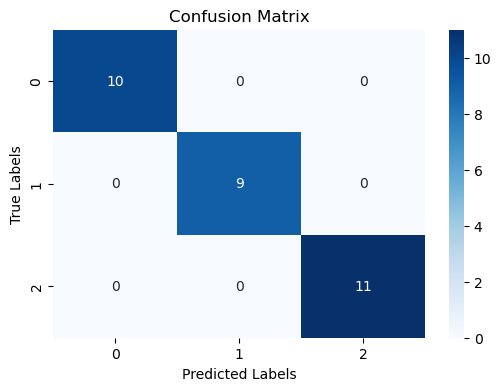

In [47]:
# visualization of confusion matrix

plt.figure(figsize=(6, 4))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [34]:
# finding the correct and false prediction and the accuracy using the confusion matrix

shape_conf = conf.shape
correct_Pred = 0
false_Pred = 0

for row in range(shape_conf[0]):
    for column in range(shape_conf[1]):
        if row == column:
            correct_Pred +=conf[row,column]
        else:
            false_Pred += conf[row,column]
print('Correct predictions: ', correct_Pred)
print('False predictions', false_Pred)
print ('Accuracy of the Random Forest Classifier is: ', correct_Pred/(conf.sum())) 

Correct predictions:  30
False predictions 0
Accuracy of the Random Forest Classifier is:  1.0


In [35]:
# findiing the accuracy of the model

print ("The accuracy of Random Forest Classifier is : ", accuracy_score(y_test, prediction_data))

The accuracy of Random Forest Classifier is :  1.0


In [40]:
# finding the F1-SCORE of the model

print("The F1-Score of Random Forest Classifier is: ",f1_score(y_test,prediction_data, average='macro'))

The F1-Score of Random Forest Classifier is:  1.0


In [41]:
# finding the Precision of the model

precision = precision_score(y_test, prediction_data,average='macro')
print("Precision Score of Random Forest Classifier is:", precision)

Precision Score of SUPPORT VECTOR MACHINE is: 1.0


In [42]:
#finding the RECALL-SCORE of the model

recall = recall_score(y_test, prediction_data,average='macro')
print("Recall Score of Random Forest Classifier is:", recall)

Recall Score of SUPPORT VECTOR MACHINE is: 1.0


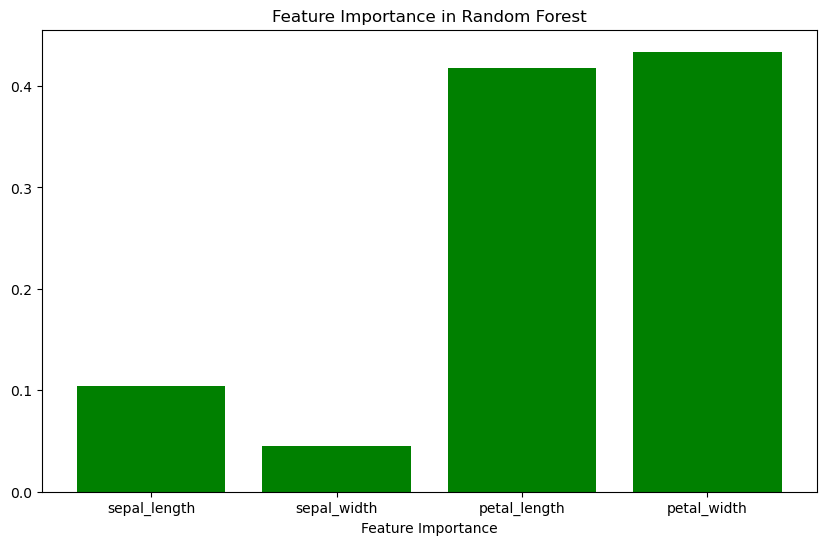

In [53]:
#  visiualizing the feature importance graph

importances = rf_classifier.feature_importances_
features = rnf_data.columns[:-1]

plt.figure(figsize=(10, 6))
plt.bar(features, importances, color='green')
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest')
plt.show()